In [136]:
import matplotlib.pyplot as plt
import random

In [137]:
class LinearCongruentialGenerator:
    seed = 42
    alpha = 1664525
    c = 1013904223
    m = 2 ** 32
    x_current = seed
     
    @staticmethod
    def random():
        LinearCongruentialGenerator.x_current = (LinearCongruentialGenerator.alpha * LinearCongruentialGenerator.x_current + LinearCongruentialGenerator.c) % LinearCongruentialGenerator.m
        return LinearCongruentialGenerator.x_current / LinearCongruentialGenerator.m

In [138]:
generator = LinearCongruentialGenerator()
num_samples = 10**6

# Task 1

In [139]:
def task1(p):
    return generator.random() < p

In [140]:
custom_p = -1
while not 0 <= custom_p <= 1:
    custom_p = float(input("Enter probability (from 0 to 1)\n"))

In [141]:
count_true = sum(1 for _ in range(num_samples) if task1(custom_p))
print(count_true / num_samples)

0.299699


# Task 2

In [142]:
k = -1
while not (k >= 1): 
    k = int(input("Enter the number of random events (k):\n"))

In [143]:
probabilities = []

for i in range(k):   
    probabilities.append(float(input(f"Enter more {k - i} probabilities (from 0 to 1)\n")))

In [144]:
def task2(probabilities):
    result = []
    for i in range(len(probabilities)):
        result.append(generator.random() < probabilities[i])
    return result

In [145]:
count = [{True: 0, False: 0} for _ in range(len(probabilities))]

for i in range(num_samples):
    res = task2(probabilities)
    for j in range(len(res)):
        count[j][res[j]] += 1

In [146]:
emperical_p = []
for i in count:
    emperical_p.append(i[True] / (i[True] + i[False]))
print(*emperical_p)

0.200043 0.300283 0.500582 0.100239


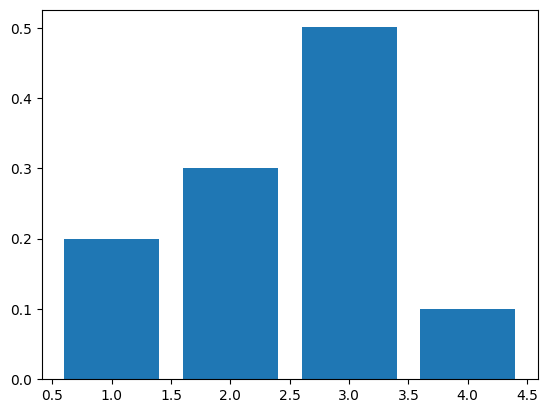

In [147]:
plt.bar([i for i in range(1, len(probabilities) + 1)], [count[i][True] / (count[i][True] + count[i][False]) for i in range(len(count))])

plt.show()

# Task 3

In [148]:
p_a = -1
while not 0 <= p_a <= 1:
    p_a = float(input("Enter the probability P(A) (from 0 to 1)\n"))

In [149]:
p_b_a = -1
while not 0 <= p_b_a <= 1:
    p_b_a = float(input("Enter the probability P(B/A) (from 0 to 1)\n"))

In [150]:
def task3(p_a, p_b_a):
    p_ab = p_a * p_b_a
    p_a_notb = p_a * (1 - p_b_a)
    p_nota_b = (1 - p_a) * (1 - p_b_a)
    p_nota_notb = p_b_a * (1 - p_a)

    r = generator.random()
    if r <= p_ab:
        return 0
    elif r <= p_a_notb + p_ab:
        return 1
    elif r <= p_a_notb + p_ab + p_nota_b:
        return 2
    elif r <= p_a_notb + p_ab + p_nota_b + p_nota_notb:
        return 3

In [151]:
count = {i: 0 for i in range(4)}

for i in range(num_samples):
    count[task3(p_a, p_b_a)] += 1

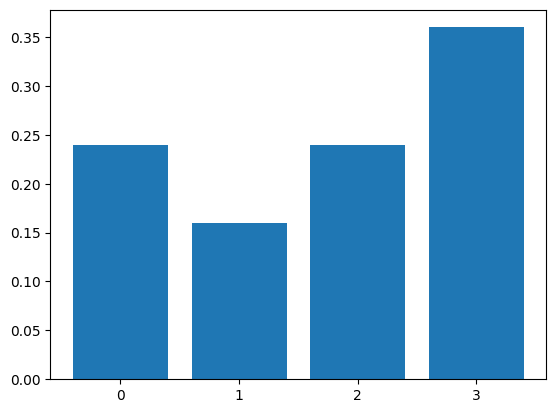

In [152]:
plt.bar([str(i) for i in range(4)], 
        [count[i] / num_samples for i in range(4)])
plt.show()

In [153]:
emperical_p = [count[i] / num_samples for i in range(4)]
print(*emperical_p)

0.239722 0.160258 0.240058 0.359962


# Task 4

In [154]:
k = -1
while not (1 <= k): 
    k = int(input("Input random event number (k):\n"))

In [155]:
probabilities = []

while sum(probabilities) != 1:
    for i in range(k):
        probabilities.append(float(input(f"Enter more {k - i} probabilities, available sum is {1 - sum(probabilities)}")))

In [156]:
def task4(probabilities):
    s = probabilities[0]
    step = 0
    r = generator.random()
    while True:
        if r <= s:
            return step
        else:
            step += 1
            s += probabilities[step]

In [157]:
count = {i: 0 for i in range(len(probabilities))}

for i in range(num_samples):
    count[task4(probabilities)] += 1

In [158]:
emperical_p = []
for i in count:
    emperical_p.append(count[i] / num_samples)
print(*emperical_p)

0.199504 0.400314 0.200542 0.19964


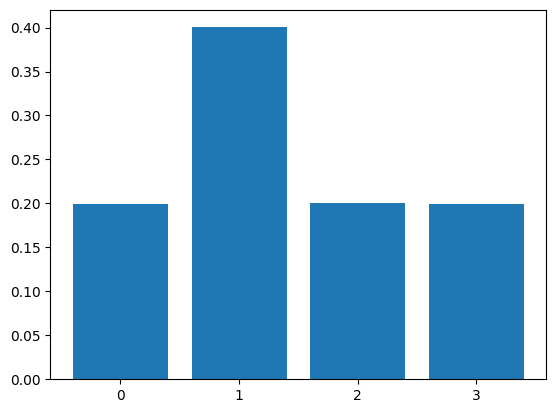

In [159]:
plt.bar([str(i) for i in range(len(count))], 
        [count[i] / num_samples for i in range(len(count))])
plt.show()

# Дополнительное задание

In [164]:
def get_team_rates(k):
    rates = []
    for i in range(2 ** k):
        successful = False
        while not successful:
            rate = int(input(f"Input rate of team number {i + 1}:\n"))
            if not 0 <= rate <= 100:
                successful = False
                continue
            successful = True
        rates.append(rate)
    return rates

In [165]:
def play_round(playing_teams, rates, round_number):
    random.shuffle(playing_teams)
    print(f'\nRound number {round_number + 1}')
    
    winners = []
    for j in range(len(playing_teams) // 2):
        first = playing_teams[j]
        second = playing_teams[-(j + 1)]
        print(f'Team {first} vs Team {second}')
        
        common_rate = rates[first - 1] + rates[second - 1]
        res = task4([rates[first - 1] / common_rate, rates[second - 1] / common_rate])
        
        winner = first if res == 0 else second
        print(f'Team number won - {winner}')
        winners.append(winner)
    
    return winners

In [166]:
def print_rates(rates):
    print([{f"Team {i + 1}" : rates[i]} for i in range(len(rates))])

In [167]:
k = None
while not k or k > 6:
    k = int(input("Input team number (k):\n"))
rates = get_team_rates(k)
playing_teams = list(range(1, 2 ** k + 1))
print_rates(rates)

for i in range(k):
    playing_teams = play_round(playing_teams, rates, i)

print(f'\n\nWinner - Team {playing_teams[0]}')

[{'Team 1': 12}, {'Team 2': 60}, {'Team 3': 1}, {'Team 4': 23}, {'Team 5': 54}, {'Team 6': 76}, {'Team 7': 87}, {'Team 8': 32}]

Round number 1
Team 6 vs Team 5
Team number won - 6
Team 3 vs Team 2
Team number won - 2
Team 7 vs Team 1
Team number won - 7
Team 8 vs Team 4
Team number won - 8

Round number 2
Team 6 vs Team 2
Team number won - 6
Team 7 vs Team 8
Team number won - 7

Round number 3
Team 6 vs Team 7
Team number won - 6


Winner - Team 6
